In [1]:
print("Hello World!")
import matplotlib.pyplot as plt
import numpy as np

Hello World!


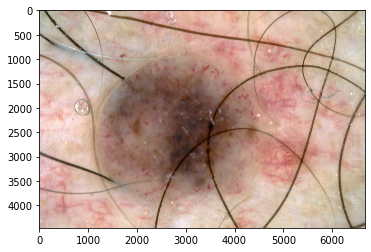

In [6]:
im = plt.imread('fyp2022-imaging/data/example_image/ISIC_0015483.jpg')
plt.imshow(im)

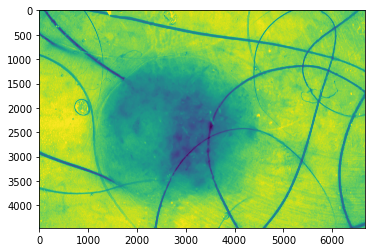

In [11]:
plt.imshow(im[:,:,0])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6840a14b-d41a-45b9-abd0-892354334cb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>